In [41]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms
%matplotlib inline
import matplotlib
import cv2

In [2]:
img = cv2.imread('/Users/YINAN/Local/Sealions/Data/SealionBinaryFull/0_dot.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

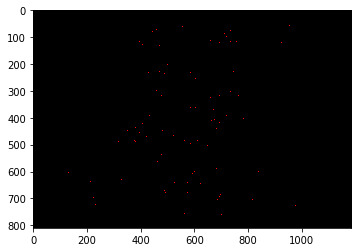

In [3]:
plt.imshow(img)

In [4]:
class TargetConstructNet(nn.Module):

    def __init__(self):

        super(TargetConstructNet, self).__init__()

        self.layer = nn.Conv2d(3, 1, kernel_size=48, padding=0)

        # assign weights
        w = torch.zeros((1, 3, 48, 48), dtype=torch.float)
        for i in range(3):
            w[0, i, :, :] = 1
        self.layer.weight = nn.Parameter(w)
        self.layer.bias = nn.Parameter(torch.zeros(1, dtype=torch.float))

        # freeze weights
        for param in self.layer.parameters():
            param.require_grad = False

    def forward(self, x):

        x = self.layer(x)

        return x

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
target_model = TargetConstructNet().to(device)

In [6]:
img_tensor = transforms.ToTensor()(img)
taget_map = target_model.forward(img_tensor.unsqueeze(0))

In [11]:
target_map_np = taget_map.squeeze().detach().numpy()

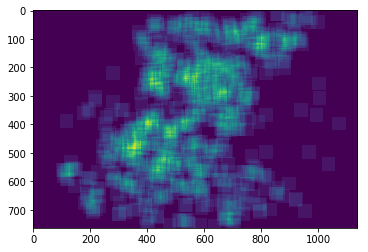

In [12]:
plt.imshow(target_map_np)

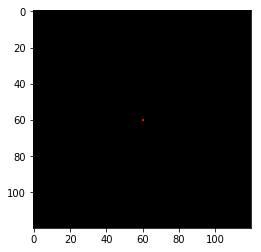

In [42]:
# plot one pixel example
x = np.zeros((120, 120, 3))
x[60][60][0] = 1
plt.imshow(x)
matplotlib.image.imsave('virtual_image.png', x)

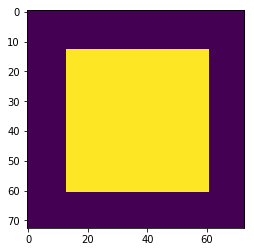

In [43]:
x_tensor = transforms.ToTensor()(x)
x_tensor = x_tensor.unsqueeze(0)
x_tensor = x_tensor.type(torch.FloatTensor)
y = target_model.forward(x_tensor)
y = y.squeeze()
plt.imshow(y.detach().numpy())
matplotlib.image.imsave('activation_map.png', y.detach().numpy())

In [30]:
y.shape

torch.Size([73, 73])

In [31]:
x.shape

(120, 120, 3)

In [40]:
y_np = y.detach().numpy()
cnt = 0
for j in range(y_np.shape[1]):
    if y_np[20][j] != 0:
        cnt += 1
print(cnt)

48
